In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split

In [9]:
dataset=pd.read_csv("linear_dataset.csv")

In [10]:
dataset.head()

,x,y
0,82.583220,134.907414
1,73.922466,134.085180
2,34.887445,NaN
3,61.839983,114.530638
4,16.775940,31.376437


In [12]:
dataset.isnull().sum()

x    0
y    8
dtype: int64

In [17]:
dataset.fillna(value=dataset.y.mean(),inplace=True)
dataset.isnull().sum()

x    0
y    0
dtype: int64

In [18]:
dataset.describe()

,x,y
count,100.000000,100.000000
mean,52.099330,87.915132
std,29.416763,45.150390
min,0.016737,-6.236295
25%,29.012087,52.047526
50%,55.255856,87.915132
75%,77.442040,126.556343
max,99.432294,166.164544


In [37]:
dataset.x=(dataset.x- dataset.x.min()) / (dataset.x.max()-dataset.x.min())
dataset.y= (dataset.y- dataset.y.min()) / (dataset.y.max()- dataset.y.min())

In [34]:
"""dataset.head()"""

'dataset.head()'

In [35]:
"""dataset.loc[1,"x"]"""

'dataset.loc[1,"x"]'

In [36]:
"""dataset.iloc[2,1]"""

'dataset.iloc[2,1]'

In [38]:
X=dataset.x
y=dataset.y

No handles with labels found to put in legend.


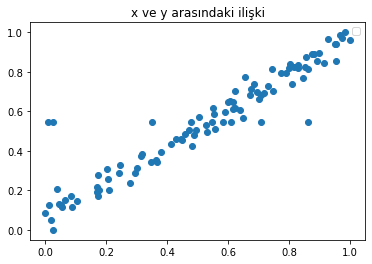

In [43]:
plt.scatter(X.values,y.values)
plt.xlabel=('x')
plt.ylabel=('y')
plt.title('x ve y arasındaki ilişki')
plt.legend()

In [44]:
lr=LinearRegression()

In [46]:
lr.fit(X.values.reshape(-1,1),y.values.reshape(-1,1))

LinearRegression()

In [47]:
lr.coef_, lr.intercept_

(array([[0.83833805]]), array([0.10692427]))

In [49]:
print( "kurulan regresyon modeli y= {} + {}*x".format(lr.intercept_[0].round(2),lr.coef_[0][0].round(2)))

kurulan regresyon modeli y= 0.11 + 0.84*x


In [50]:
y_predicted=lr.predict(X.values.reshape(-1,1))
r2_score(y,y_predicted)

0.8971708595884971

In [56]:
dataset=pd.DataFrame({'y': y.values.flatten(),'y_predicted':y_predicted.flatten()})
dataset

,y,y_predicted
0,0.818695,0.803180
1,0.813926,0.730146
2,0.546119,0.400977
3,0.700501,0.628259
4,0.218170,0.248249
...,...,...
95,0.812981,0.829807
96,0.771826,0.656422
97,0.327690,0.311982
98,0.875813,0.824890


In [57]:
mean_squared_error(y,y_predicted,squared=False)

0.08355988368688008

In [58]:
b0=lr.intercept_[0].round(2)
b1=lr.coef_[0][0].round(2)

TypeError: 'str' object is not callable

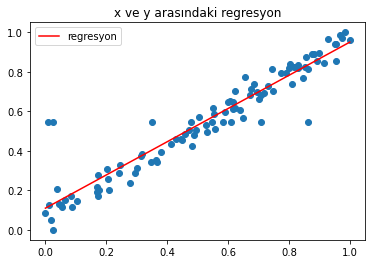

In [66]:
random_x=np.array([0,1])
plt.plot(random_x,b0+b1*random_x, color='red', label='regresyon')
plt.scatter(X.values,y.values)
plt.legend()
plt.title('x ve y arasındaki regresyon')
plt.xlabel('x')